<a href="https://colab.research.google.com/github/SmokeTrails/JSC270_Assg2/blob/mohsin/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries that I'll need

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pylab as pl

Importing Data

In [15]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

# Initial Data Exploration

## Question 1

In [5]:
income94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           32561 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          32561 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      32561 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Question 2


In [ ]:
# Print the number of observations in each column.
for s in income94.columns:
  print(income94[s].value_counts())

In [23]:
# Print the number of missing observations in each column
income94 = income94.replace(' ?', np.nan)
missing = {}
for s in income94.columns:
  missing[s] = 32561 - income94[s].count()
missing

{'age': 0,
 'capital_gain': 0,
 'capital_loss': 0,
 'education': 0,
 'education_num': 0,
 'fnlwgt': 0,
 'gross_income_group': 0,
 'hours_per_week': 0,
 'marital_status': 0,
 'native_country': 583,
 'occupation': 1843,
 'race': 0,
 'relationship': 0,
 'sex': 0,
 'workclass': 1836}

## Question 3

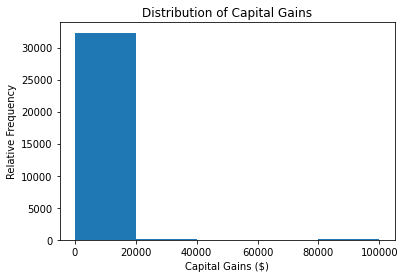

In [31]:
# Plot the distribution of capital gains
plt.hist(income94.capital_gain, bins = 5)
plt.title("Distribution of Capital Gains")
plt.xlabel("Capital Gains ($)")
plt.ylabel("Relative Frequency")
plt.show()

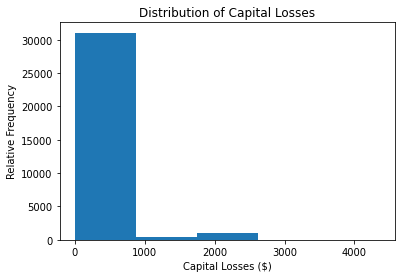

In [26]:
# Plot the distribution of capital losses
plt.hist(income94.capital_loss, bins = 5)
plt.title("Distribution of Capital Losses")
plt.xlabel("Capital Losses ($)")
plt.ylabel("Relative Frequency")
plt.show()

## Question 4

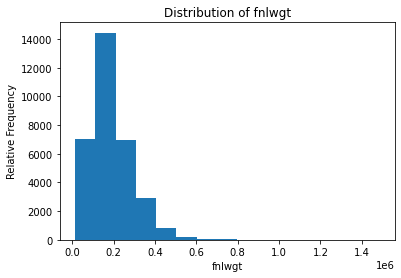

In [46]:
# Plot or numerically explore the distribution of fnlwgt
plt.hist(income94.fnlwgt, bins = 15)
plt.title("Distribution of fnlwgt")
plt.xlabel("fnlwgt")
plt.ylabel("Relative Frequency")
plt.show()

Text(0.5, 0.98, 'Distribution of fnlwgt by sex')

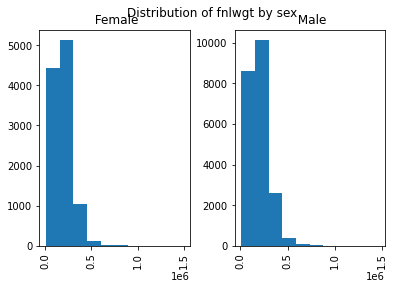

In [45]:
# Compare the distribution of this variable between men and women
income94['fnlwgt'].hist(by=income94['sex'])
pl.suptitle("Distribution of fnlwgt by sex")

# Correlation

In [24]:
# Do any of the variables appear to be correlated?
income94_modified = income94[['age', 'education_num', 'hours_per_week']].copy()
income94_modified.corr()

,age,education_num,hours_per_week
age,1.000000,0.036527,0.068756
education_num,0.036527,1.000000,0.148123
hours_per_week,0.068756,0.148123,1.000000


In [25]:
# Statistically test any variable pairs with a correlation coefficient > |0.1| for its
# difference from 0 and report your result
from scipy.stats import ttest_ind
print(ttest_ind(income94_modified['education_num'], income94_modified['hours_per_week']))

Ttest_indResult(statistic=-434.3097872965163, pvalue=0.0)


In [56]:
# How does the correlation (and its significance) between education_num and age
# compare between male and female participants?
income94_modified['sex'] = income94['sex'].copy()
income94_modified.groupby('sex').corr()

age  education_num  hours_per_week
sex                                                            
 Female age             1.000000      -0.017899        0.081257
        education_num  -0.017899       1.000000        0.178749
        hours_per_week  0.081257       0.178749        1.000000
 Male   age             1.000000       0.060486        0.034124
        education_num   0.060486       1.000000        0.136782
        hours_per_week  0.034124       0.136782        1.000000

In [31]:
# How does the significance of the correlation between education_num and age
# compare between male and female participants?
male = income94.loc[income94['sex'] == ' Male']
print("Hypothesis test between education_num and age for males: ")
print(ttest_ind(male['education_num'], male['age']))
print("\n")
print("Hypothesis test between education_num and age for females: ")
female = income94.loc[income94['sex'] == ' Female']
print(ttest_ind(female['education_num'], female['age']))

Hypothesis test between education_num and age for males: 
Ttest_indResult(statistic=-317.5802686941918, pvalue=0.0)


Hypothesis test between education_num and age for females: 
Ttest_indResult(statistic=-195.83931767962255, pvalue=0.0)


In [37]:
# Compare the weighted vs unweighted variance and covariance between
# education_num and hourse_per_week.
print("Unweighted variance of education num: ")
print(income94.var()['education_num'])
print('\n')
print("Weighted variance of education num: ")
average = np.average(income94['education_num'], weights=income94['fnlwgt'])
print(np.average((income94['education_num'] - average)**2, weights=income94['fnlwgt']))
print('\n')
print("Unweighted variance of hours per week: ")
print(income94.var()['hours_per_week'])
print('\n')
print("Weighted variance of hours per week: ")
average = np.average(income94['hours_per_week'], weights=income94['fnlwgt'])
print(np.average((income94['hours_per_week'] - average)**2, weights=income94['fnlwgt']))
print('\n')
print("Covariance between education num and hours per week: ")
income94_modified.cov()


Unweighted variance of education num: 
6.618889907032687


Weighted variance of education num: 
6.828646539770926


Unweighted variance of hours per week: 
152.45899505042865


Weighted variance of hours per week: 
146.3306330028469


Covariance between education num and hours per week: 


,age,education_num,hours_per_week
age,186.061400,1.281849,11.580130
education_num,1.281849,6.618890,4.705338
hours_per_week,11.580130,4.705338,152.458995


# Regression


In [46]:
# Fit a linear regression with hours_per_week as the dependent variable and sex as the independent variable.
income94['sex_bin'] = (income94.sex == " Male").astype(int)
reg1 = smf.ols('hours_per_week ~ sex_bin', data = income94).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1807.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:47:39   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32559   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4104      0.116    314.412      0.0

In [47]:
# Add education_num as a control variable
reg2 = smf.ols('hours_per_week ~ sex_bin + education_num', data = income94).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1295.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:52:33   Log-Likelihood:            -1.2680e+05
No. Observations:               32561   AIC:                         2.536e+05
Df Residuals:                   32558   BIC:                         2.536e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        29.4106      0.281    104.556

In [55]:
# Now add gross_income_group as a binary variable in the model and compare the
# model with these 3 variables
income94['gross_income_bin'] = (income94.gross_income_group == " >50K").astype(int)
reg3 = smf.ols('hours_per_week ~ sex_bin + education_num + gross_income_bin', data = income94).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1130.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        16:06:46   Log-Likelihood:            -1.2643e+05
No. Observations:               32561   AIC:                         2.529e+05
Df Residuals:                   32557   BIC:                         2.529e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           31.4218      0.288  